In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head()
print(df.shape)
df.info()

(225000, 325)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225000 entries, 0 to 224999
Columns: 325 entries, _STATE to TARGET
dtypes: bool(1), float64(318), int64(6)
memory usage: 556.4 MB


In [4]:
all_columns = df.columns.values
# print(all_columns)
column_of_interest = ['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'WEIGHT2', 'HEIGHT3', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 'ECIGNOW2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVRISK5', 'COVIDPOS', 'COVIDSMP', 'COVIDPRM', 'PDIABTS1', 'PREDIAB2', 'DIABTYPE', 'INSULIN1', 'CHKHEMO3', 'EYEEXAM1', 'FEETSORE', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'COVIDVA1', 'SHINGLE2', 'COPDCOGH', 'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'COPDSMOK', 'CNCRDIFF', 'CNCRAGE', 'CNCRTYP2', 'CSRVDOC1', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEPUNCH', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHSTRE1', 'MARIJAN1', 'MARJSMOK']

columns_to_delete = ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'Num', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'NUMADULT', 'RESPSLCT', 'SAFETIME', 'CELLFON5', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'CHILDREN']

k = 0
for c in column_of_interest :
    if c not in all_columns :
        print(f"column '{c}' is not in dataframe")
    else :
        k+=1
        #print("good")
        pass
print(k)


for c in columns_to_delete :
    if c not in all_columns :
        print(f"column '{c}' is not in dataframe")
    else :
        #print("good")
        pass

df = df[column_of_interest]


84
column 'Num' is not in dataframe


# Feature engineering

In [5]:
"""
Heatmap visualization using Plotly.
Colors will be:
    from -inf to central_limit_val : black
    from central_limit_val to +inf : blue to pink shades
Args:
    matrix: 2D array containing the data values
    xlabels: Labels for x-axis (columns)
    ylabels: Labels for y-axis (rows)
    central_limit_val: Define color thresold. If None, auto-calculated
    plot: Whether to display the plot
    full_plotly_offline: Whether to include full Plotly JS in HTML output
Returns:
    HTML string of the plot
"""

def plot_nan_proportion_heatmap(matrix, xlabels, ylabels, width=800, height=500, plot=True, full_plotly_offline=False):
    # Convert to DataFrame
    df = pd.DataFrame(matrix, columns=xlabels, index=ylabels)

    # Create a NaN indicator matrix: 1 for NaN, 0 for non-NaN
    nan_indicator = df.isna().astype(int)

    # Plot the NaN indicator matrix
    fig = px.imshow(
        nan_indicator,
        width=width,
        height=height,
        template="plotly_white",
        color_continuous_scale="Greys",  # Use a grayscale gradient
        labels={"color": "NaN Proportion"},
        aspect="auto",
        zmin=0,
        zmax=1,
    )
    fig.update_xaxes(side="top", tickangle=45, tickfont=dict(size=5))
    fig.update_layout(
        margin=dict(pad=1),
        # title="Proportion of NaN Values (1 = NaN, 0 = Non-NaN)",

    )

    # Return or show
    if plot:
        fig.show()
    if full_plotly_offline:
        return fig.to_html(full_html=True)
    else:
        return fig.to_html(full_html=False, include_plotlyjs=False)


plot_nan_proportion_heatmap(df.head(100), xlabels=column_of_interest, ylabels=range(100))



'<div>                            <div id="645c0c05-9bdf-4703-8ad1-8c57af212de0" class="plotly-graph-div" style="height:500px; width:800px;"></div>            <script type="text/javascript">                window.PLOTLYENV=window.PLOTLYENV || {};                                if (document.getElementById("645c0c05-9bdf-4703-8ad1-8c57af212de0")) {                    Plotly.newPlot(                        "645c0c05-9bdf-4703-8ad1-8c57af212de0",                        [{"coloraxis":"coloraxis","name":"0","x":["SEXVAR","GENHLTH","PHYSHLTH","MENTHLTH","POORHLTH","PRIMINSR","PERSDOC3","MEDCOST1","CHECKUP1","EXERANY2","SLEPTIM1","LASTDEN4","CVDSTRK3","ASTHMA3","ASTHNOW","CHCSCNC1","CHCOCNC1","CHCCOPD3","ADDEPEV3","CHCKDNY2","HAVARTH4","DIABETE4","WEIGHT2","HEIGHT3","DECIDE","DIFFWALK","DIFFDRES","DIFFALON","SMOKE100","SMOKDAY2","USENOW3","ECIGNOW2","LCSFIRST","LCSLAST","LCSNUMCG","ALCDAY4","AVEDRNK3","DRNK3GE5","MAXDRNKS","FLUSHOT7","HIVRISK5","COVIDPOS","COVIDSMP","COVIDPRM","PDIABTS1","PRED

SEXVAR      0.000000
GENHLTH     0.000004
PHYSHLTH    0.000018
MENTHLTH    0.000009
POORHLTH    0.428258
              ...   
FOODSTMP    0.459009
SDHFOOD1    0.459884
SDHSTRE1    0.463507
MARIJAN1    0.779591
MARJSMOK    0.972227
Length: 84, dtype: float64


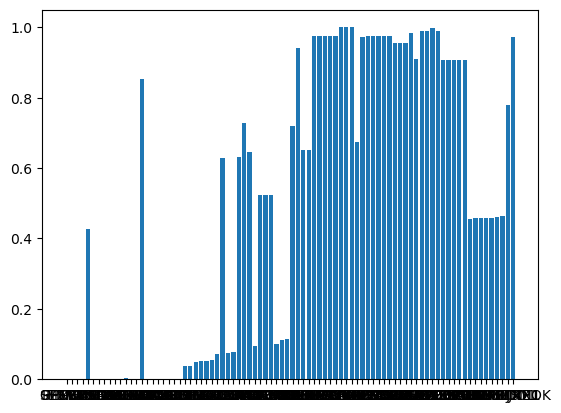

In [6]:
def calculate_nan_proportion(matrix, xlabels):
    """
    Calculate the proportion of NaN values in each column.

    Args:
        matrix: 2D array or DataFrame containing the data.
        xlabels: Labels for the columns.

    Returns:
        A DataFrame with columns and their NaN proportions.
    """
    df = pd.DataFrame(matrix, columns=xlabels)
    nan_proportion = df.isna().mean(axis=0)  # Proportion of NaNs per column
    return nan_proportion

nans_prop = calculate_nan_proportion(df, xlabels=column_of_interest)

plt.bar(column_of_interest, height=nans_prop)
print(nans_prop)


In [7]:
nan_threshold = 0.4

print(f"We remove columns containing more than {nan_threshold*100} % of NaNs")
rem_cols = nans_prop[nans_prop > nan_threshold]
print(rem_cols)
print(f"Number of columns to remove {len(rem_cols)}")
df = df[~df.isin(rem_cols)]

df.head()

We remove columns containing more than 40.0 % of NaNs
POORHLTH    0.428258
ASTHNOW     0.852787
SMOKDAY2    0.627284
LCSFIRST    0.632831
LCSLAST     0.726662
LCSNUMCG    0.645271
AVEDRNK3    0.522147
DRNK3GE5    0.523311
MAXDRNKS    0.524342
COVIDSMP    0.719582
COVIDPRM    0.940156
PDIABTS1    0.652640
PREDIAB2    0.652733
DIABTYPE    0.975471
INSULIN1    0.975471
CHKHEMO3    0.975471
EYEEXAM1    0.975471
FEETSORE    0.975471
TOLDCFS     1.000000
HAVECFS     1.000000
WORKCFS     1.000000
COVIDVA1    0.673000
SHINGLE2    0.971156
COPDCOGH    0.975853
COPDFLEM    0.975876
COPDBRTH    0.975911
COPDBTST    0.975956
COPDSMOK    0.976004
CNCRDIFF    0.954102
CNCRAGE     0.955662
CNCRTYP2    0.955689
CSRVDOC1    0.983969
CIMEMLOS    0.910307
CDHOUSE     0.989409
CDASSIST    0.989440
CDHELP      0.997222
CDSOCIAL    0.989480
ACEDEPRS    0.906444
ACEDRINK    0.906564
ACEDRUGS    0.906587
ACEPRISN    0.906618
ACEPUNCH    0.906729
LSATISFY    0.456369
EMTSUPRT    0.457102
SDHISOLT    0.457796
S

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,...,ACEPUNCH,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHSTRE1,MARIJAN1,MARJSMOK
0,2.0,3.0,30.0,88.0,88.0,3.0,1.0,2.0,1.0,1.0,...,NaN,1.0,2.0,5.0,2.0,2.0,5.0,5.0,NaN,NaN
1,2.0,3.0,88.0,15.0,14.0,10.0,2.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,5.0,4.0,NaN,NaN
3,1.0,3.0,88.0,88.0,NaN,1.0,3.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,3.0,88.0,3.0,88.0,9.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Instead of removing all lines with NaNs, which will result on not enough data, we will replace NaNs values that are representative of the columns

In first instance, for categories with NaNs, we will replace those NaNs with the catagoriy that is the most present

In [19]:
df_fteng_mode = df.copy()
df_fteng_mode.head()
df_fteng_mode.columns.values

array(['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2',
       'SLEPTIM1', 'LASTDEN4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW',
       'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2',
       'HAVARTH4', 'DIABETE4', 'WEIGHT2', 'HEIGHT3', 'DECIDE', 'DIFFWALK',
       'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'USENOW3',
       'ECIGNOW2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'ALCDAY4',
       'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVRISK5',
       'COVIDPOS', 'COVIDSMP', 'COVIDPRM', 'PDIABTS1', 'PREDIAB2',
       'DIABTYPE', 'INSULIN1', 'CHKHEMO3', 'EYEEXAM1', 'FEETSORE',
       'TOLDCFS', 'HAVECFS', 'WORKCFS', 'COVIDVA1', 'SHINGLE2',
       'COPDCOGH', 'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'COPDSMOK',
       'CNCRDIFF', 'CNCRAGE', 'CNCRTYP2', 'CSRVDOC1', 'CIMEMLOS',
       'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'ACEDEPRS',
       'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEPUNCH', 'LSATISFY',
  

In [22]:
df_fteng_mode.mode().iloc[0]
def replace_nan_mode(df):
    """
    Replaces NaN values in each column of a DataFrame with the most frequent value (mode) of that column.

    Parameters:
    df (pd.DataFrame): Input DataFrame

    Returns:
    pd.DataFrame: DataFrame with NaN values replaced by the mode of each column
    """
    for column in df.columns:
        mode = df[column].mode()
        if not mode.empty:  # Only replace if mode exists (i.e., column is not empty)
            df[column].fillna(mode[0])
    return df

df_fteng_mode = replace_nan_mode(df_fteng_mode)

df_fteng_mode.head()

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,...,ACEPUNCH,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHSTRE1,MARIJAN1,MARJSMOK
0,2.0,3.0,30.0,88.0,88.0,3.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,5.0,2.0,2.0,5.0,5.0,88.0,1.0
1,2.0,3.0,88.0,15.0,14.0,10.0,2.0,2.0,3.0,2.0,...,1.0,2.0,1.0,5.0,2.0,2.0,5.0,5.0,88.0,1.0
2,1.0,2.0,88.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,5.0,4.0,88.0,1.0
3,1.0,3.0,88.0,88.0,88.0,1.0,3.0,2.0,1.0,1.0,...,1.0,2.0,1.0,5.0,2.0,2.0,5.0,5.0,88.0,1.0
4,1.0,3.0,88.0,3.0,88.0,9.0,2.0,2.0,1.0,1.0,...,1.0,2.0,1.0,5.0,2.0,2.0,5.0,5.0,88.0,1.0
